# Homework 2 Question 1

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import curve_fit

In [28]:
temp = np.arange(100.0,1000.1,25.0)

'''
temp is in °C.

constants array is arranged like this:
[CO2 -> A  B  C  D
 H2O -> A  B  C  D
 O2 ->  A  B  C  D
 N2 ->  A  B  C  D]

 Units:
 A (J/mol-°C)
 B (J/mol-°C^2)
 C (J/mol-°C^3)
 D (J/mol-°C^4)

'''

constants = np.array([36.11, 4.233e-2, -2.887e-5, 7.464e-9,
                      33.46, 0.688e-2, 0.7605e-5, -3.594e-9,
                      29.10, 1.158e-2, -0.6076e-5, 1.311e-9,
                      29.00, 0.2199e-2, 0.5723e-5, -2.871e-9])


We are given the equation for heat capacity,
Cp = A + BT + CT^2 + DT^3

In [29]:
def heat_cap(A,B,C,D,T):

    '''
    This function uses the equation above to calculate the heat capacities of certain molecules with given temperatures 
    using coefficients unique to each molecule.

    Inputs:
    A, B, C, D - coefficents defined above in constants array
    T - temperature array defined above

    Return
    Cp - this is the heat capacity for a specific molecule at a given temperature, T.
    
    '''
    Cp = A + B*T + C*np.power(T,2) + D*np.power(T,3)
    return Cp

The following cell uses the heat_cap function defined above to calculate the heat capacity for each substance at every temperature in 'temp'.

CpCO2, CpH2O, CpO2, and CpN2 are new arrays that contain the heat capacity values for CO2, H2O, O2, and N2, respectively.

In [30]:
CpCO2 = heat_cap(constants[0],constants[1],constants[2],constants[3],temp)
CpH2O = heat_cap(constants[4],constants[5],constants[6],constants[7],temp)
CpO2 = heat_cap(constants[8],constants[9],constants[10],constants[11],temp)
CpN2 = heat_cap(constants[12],constants[13],constants[14],constants[15],temp)

The cell below creates a graph of all four heat capacity arrays on one plot. CO2 is shown in red, H2O in orange, O2 in green, and N2 in blue.

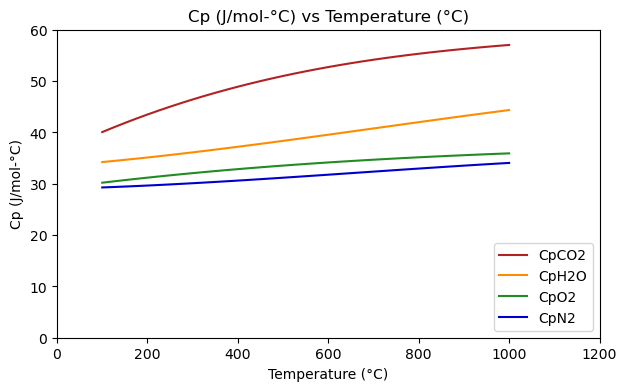

In [45]:
plt.figure(figsize=(7,4))

plt.plot(temp,CpCO2,label='CpCO2',color='firebrick')
plt.plot(temp,CpH2O,label='CpH2O',color='darkorange')
plt.plot(temp,CpO2,label='CpO2',color='forestgreen')
plt.plot(temp,CpN2,label='CpN2',color='mediumblue')

plt.title('Cp (J/mol-°C) vs Temperature (°C)')

plt.xlim([0,1200])
plt.ylim([0,60])

plt.legend(loc='lower right')

plt.xlabel('Temperature (°C)', fontsize=10)
plt.ylabel('Cp (J/mol-°C)', fontsize=10)

plt.savefig("Question 1 graph")
plt.show()


# Question 2

First, I imported data from the given txt file and separated them into numpy arrays for temperature, given in Kelvin (temp2), and the collected heat capacity values, given in J/mol-K (CpC2F4_data).

In [32]:
data = np.genfromtxt('HW2_calorimetry_data.txt', delimiter = '\t')
print(data)

[[    nan     nan]
 [   0.     78.48]
 [  50.     86.95]
 [ 100.     84.76]
 [ 150.     95.94]
 [ 200.    100.25]
 [ 250.    100.96]
 [ 300.    102.07]
 [ 350.    104.83]
 [ 400.    107.24]
 [ 450.    111.61]
 [ 500.    112.34]
 [ 550.    116.29]
 [ 600.    111.85]
 [ 650.    115.44]
 [ 700.    121.34]
 [ 750.    127.22]
 [ 800.    128.2 ]
 [ 850.    127.91]
 [ 900.    117.67]
 [ 950.    121.  ]
 [1000.    120.65]
 [1050.    130.48]
 [1100.    126.52]]


In [33]:
temp2 = np.array(data[1:,0])
CpC2F4_data = np.array(data[1:,1])

'''
Units:
temp2 (K)
CpC2F4_observed (J/mol-K)
'''


'\nUnits:\ntemp2 (K)\nCpC2F4_observed (J/mol-K)\n'

Next, I created an array of my initial guesses and defined a function to calculate my SSE.

In [34]:
cong = np.array([80,.012,-7e-5,14e-9])
# cong stands for constants guesses. They are arranged [Aguess,Bguess,Cguess,Dguess].


In [41]:
def SSE(con):
    
    '''
    This function calculates the Sum of Squares Error.
    
    Input:
    con (array) - these are my initial guesses for constants.
    
    Output:
    SSEcalc (float) - this is the calculated SSE value using the initial constant guesses.
    '''
    
    guess = con[0] + con[1]*temp2 + con[2]*np.power(temp2,2) + con[3]*np.power(temp2,3)
    actual = CpC2F4_data
    # Guess and actual use the equation given, 𝐶𝑝 = A + BT + CT^2 + DT^3.
    
    Error = guess-actual
    Error_sq = np.power(Error,2)
    SSEcalc = np.sum(Error_sq)

    return SSEcalc

In [36]:
C2F4_SSE = SSE(cong)
print(C2F4_SSE)

74322.24187718748


Here, the minimize function from scipy.optimize is used to minimize the SSE function and return the desired constant values.

In [37]:
miniSSE = minimize(SSE,cong)
[Af,Bf,Cf,Df] = miniSSE.x
print(miniSSE.x)

[ 8.00000000e+01  1.20003449e-02  1.10399329e-04 -8.21693933e-08]


In [38]:
Cp_model = heat_cap(Af,Bf,Cf,Df,temp2)
#This defines the final Cp model using the final constants calculated above.

Finally, I graphed my heat capacity model with the minimized SSE as a line, and the given heat capacity data as discrete points on the same graph. The x-axis is temperature (K).

(0.0, 140.0)

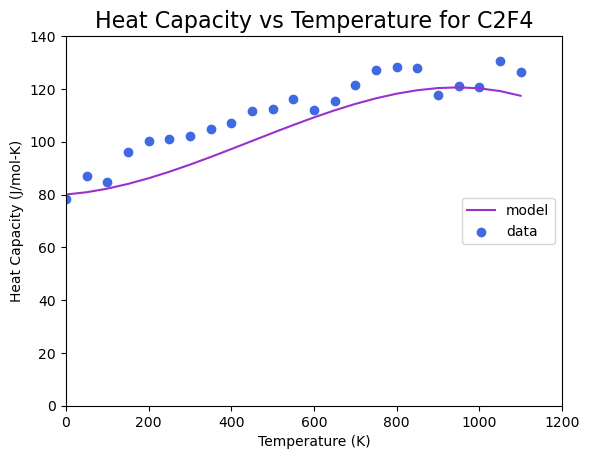

In [40]:
plt.plot(temp2,Cp_model,label='model',color='darkorchid')
plt.scatter(temp2,CpC2F4_data,label='data',color='royalblue')

plt.title('Heat Capacity vs Temperature for C2F4',fontsize=16)
plt.legend(loc='center right')
plt.xlabel('Temperature (K)',fontsize=10)
plt.ylabel('Heat Capacity (J/mol-K)',fontsize=10)

plt.xlim([0,1200])
plt.ylim([0,140])